# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [1]:
%pip install palmerpenguins

Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearn.linear_model import *
from plotnine import *
from palmerpenguins import load_penguins
import pandas as pd

# load the dataset
penguins_df = load_penguins()

# display the first few rows
display(penguins_df.head())

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [3]:
# dummify categorical variables and drop original categorical columns
df_w_dummies = pd.get_dummies(penguins_df, columns=['species', 'island', 'sex', 'year'], dummy_na=False)

# drop rows with any missing values
df_w_dummies.dropna(inplace=True)

# convert the dummy columns to integers (they are already True/False after get_dummies and dropna)
dummy_cols = ['species_Adelie', 'species_Chinstrap', 'species_Gentoo', 'island_Biscoe', 'island_Dream', 'island_Torgersen', 'sex_female', 'sex_male', 'year_2007', 'year_2008','year_2009']
df_w_dummies[dummy_cols] = df_w_dummies[dummy_cols].astype(int)

# display the first few rows of the modified dataframe
display(df_w_dummies.head())

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male,year_2007,year_2008,year_2009
0,39.1,18.7,181.0,3750.0,1,0,0,0,0,1,0,1,1,0,0
1,39.5,17.4,186.0,3800.0,1,0,0,0,0,1,1,0,1,0,0
2,40.3,18.0,195.0,3250.0,1,0,0,0,0,1,1,0,1,0,0
4,36.7,19.3,193.0,3450.0,1,0,0,0,0,1,1,0,1,0,0
5,39.3,20.6,190.0,3650.0,1,0,0,0,0,1,0,1,1,0,0


In [4]:
from sklearn.model_selection import train_test_split

# define x and y (predictor and response vars)
X = df_w_dummies.drop('bill_depth_mm', axis=1)
y = df_w_dummies['bill_depth_mm']

# test train splitt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=321)

In [5]:
# define predictor sets

# get all available predictor columns
all_predictors = X_train.columns.tolist()

# define four different sets of predictor variables
model_predictors = {
    'Model 1 (Numerical only)': ['bill_length_mm', 'flipper_length_mm', 'body_mass_g'],
    'Model 2 (Numerical + Species)': ['bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'species_Adelie', 'species_Chinstrap', 'species_Gentoo'],
    'Model 3 (Numerical + Island + Sex)': ['bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'island_Biscoe', 'island_Dream', 'island_Torgersen', 'sex_female', 'sex_male'],
    'Model 4 (All Predictors)': all_predictors
}

# print the predictor sets to verify
for model_name, predictors in model_predictors.items():
    print(f"{model_name} Predictors: {predictors}\n")

Model 1 (Numerical only) Predictors: ['bill_length_mm', 'flipper_length_mm', 'body_mass_g']

Model 2 (Numerical + Species) Predictors: ['bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'species_Adelie', 'species_Chinstrap', 'species_Gentoo']

Model 3 (Numerical + Island + Sex) Predictors: ['bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'island_Biscoe', 'island_Dream', 'island_Torgersen', 'sex_female', 'sex_male']

Model 4 (All Predictors) Predictors: ['bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'species_Adelie', 'species_Chinstrap', 'species_Gentoo', 'island_Biscoe', 'island_Dream', 'island_Torgersen', 'sex_female', 'sex_male', 'year_2007', 'year_2008', 'year_2009']



In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd

# train and evaluate models
results = []

for model_name, predictors in model_predictors.items():
    print(f"Training {model_name}...")

    # select the features for the current model
    X_train_subset = X_train[predictors]
    X_test_subset = X_test[predictors]

    # initialize and train the LM model
    model = LinearRegression()
    model.fit(X_train_subset, y_train)

    # predictions
    y_train_pred = model.predict(X_train_subset)
    y_test_pred = model.predict(X_test_subset)

    # calc errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # store results
    results.append({'Model': model_name, 'Train Error': train_error, 'Test Error': test_error})

# convert results to a DataFrame
results_df = pd.DataFrame(results)

# display the results
display(results_df)

Training Model 1 (Numerical only)...
Training Model 2 (Numerical + Species)...
Training Model 3 (Numerical + Island + Sex)...
Training Model 4 (All Predictors)...


,Model,Train Error,Test Error
0,Model 1 (Numerical only),2.316319,2.687671
1,Model 2 (Numerical + Species),0.676940,0.770562
2,Model 3 (Numerical + Island + Sex),1.027670,1.697204
3,Model 4 (All Predictors),0.560773,0.745432


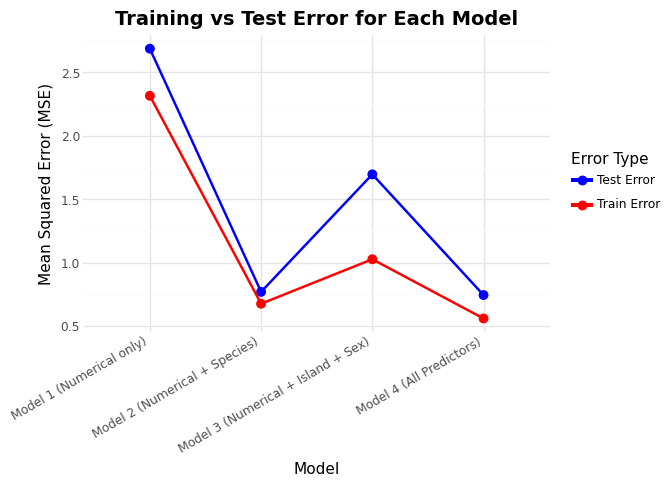

In [7]:
# columns: ['Model', 'Train Error', 'Test Error']

# melt to long format
results_melted = results_df.melt(
    id_vars='Model',
    value_vars=['Train Error', 'Test Error'],
    var_name='Type',
    value_name='MSE'
)

# plot
flexibility_plot = (
    # aes and plot type
    ggplot(results_melted, aes(x='Model', y='MSE', color='Type', group='Type')) +
    geom_point(size=3) +
    geom_line(size=1) +
    scale_color_manual(
        values={'Train Error': 'red', 'Test Error': 'blue'}
    ) +
    # labels
    labs(
        title='Training vs Test Error for Each Model',
        x='Model',
        y='Mean Squared Error (MSE)',
        color='Error Type'
    ) +
    theme_minimal() +
    # fix format
    theme(
        axis_text_x=element_text(rotation=30, ha='right'),
        plot_title=element_text(weight='bold', size=14)
    )
)

flexibility_plot


# Results

Model 2 and Model 4 were very close to each other with test errors of 0.770562 and 0.745432
respectively. Model 2 used all numerical catergories plus species. Model 4 used all the available predictors. Model 4 may be overfitting compared to Model 2, as there is a larger gap between test and train errors.
